# Training progress analysis of Learning Brain data

The code below allows to visualize and analize data from 6-week working memory training study. Participants performed 18 sessions of dual n-back training (Jaeggi et al., 2018). Each session consisted of 20 runs of the task. The level of *n* increased with at least 80% correct trials in previous run.


Karolina Finc | Centre for Modern Interdisciplinary Technologies

**Last edited**: 09.05.2017


Preparing data
--------------------------------------

In [253]:
# Loading packages
library(tidyverse)

# Setting working directory
setwd("~/Dropbox/GitHub/LearningBrain_analyses")

# Loading data
training <- read.csv("data/LB_training_progress.csv")

# Checking data
glimpse(training) 


Observations: 414
Variables: 22
$ sub     <fct> LB005, LB005, LB005, LB005, LB005, LB005, LB005, LB005, LB0...
$ session <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, ...
$ X1      <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...
$ X2      <int> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,...
$ X3      <int> 2, 2, 3, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2,...
$ X4      <int> 2, 3, 3, 2, 3, 2, 3, 3, 4, 3, 3, 4, 4, 3, 4, 4, 3, 3, 2, 2,...
$ X5      <int> 2, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 4, 4, 3, 3, 4, 3, 3, 3, 2,...
$ X6      <int> 2, 2, 3, 3, 3, 4, 2, 3, 3, 4, 3, 4, 4, 3, 3, 4, 3, 3, 2, 2,...
$ X7      <int> 2, 2, 2, 4, 2, 4, 2, 2, 4, 3, 3, 5, 5, 2, 3, 4, 4, 4, 2, 2,...
$ X8      <int> 2, 3, 1, 3, 2, 4, 2, 3, 4, 2, 3, 5, 6, 3, 4, 4, 5, 4, 3, 3,...
$ X9      <int> 1, 2, 2, 2, 3, 3, 2, 4, 4, 3, 4, 5, 6, 4, 4, 4, 5, 3, 2, 3,...
$ X10     <int> 2, 3, 3, 2, 3, 4, 3, 4, 3, 3, 4, 5, 5, 4, 4, 4, 5, 3, 2, 4,...
$ X11     <int> 2, 2

In [193]:
# Formatting subjects' names according to BIDS
training$sub <- gsub("LB0", "sub-", training$sub)

# Checking data
glimpse(training) 

Observations: 414
Variables: 22
$ sub     <chr> "sub-05", "sub-05", "sub-05", "sub-05", "sub-05", "sub-05",...
$ session <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, ...
$ X1      <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...
$ X2      <int> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,...
$ X3      <int> 2, 2, 3, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2,...
$ X4      <int> 2, 3, 3, 2, 3, 2, 3, 3, 4, 3, 3, 4, 4, 3, 4, 4, 3, 3, 2, 2,...
$ X5      <int> 2, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 4, 4, 3, 3, 4, 3, 3, 3, 2,...
$ X6      <int> 2, 2, 3, 3, 3, 4, 2, 3, 3, 4, 3, 4, 4, 3, 3, 4, 3, 3, 2, 2,...
$ X7      <int> 2, 2, 2, 4, 2, 4, 2, 2, 4, 3, 3, 5, 5, 2, 3, 4, 4, 4, 2, 2,...
$ X8      <int> 2, 3, 1, 3, 2, 4, 2, 3, 4, 2, 3, 5, 6, 3, 4, 4, 5, 4, 3, 3,...
$ X9      <int> 1, 2, 2, 2, 3, 3, 2, 4, 4, 3, 4, 5, 6, 4, 4, 4, 5, 3, 2, 3,...
$ X10     <int> 2, 3, 3, 2, 3, 4, 3, 4, 3, 3, 4, 5, 5, 4, 4, 4, 5, 3, 2, 4,...
$ X11     <int> 2, 2

Mean n-back level
--------------------------------------

In [215]:
# Adding new columns with mean and maximum n-back level across runs (for each subject, each session)

training_tidy_mean <- training %>% 
    mutate(nback_mean = rowMeans(select(train, X1:X20))) %>% 
    select(sub, session, nback_mean)

training_tidy_max <- training %>% 
    group_by(sub, session) %>% summarize(nback_max = pmax(X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X18, X19, X20))


training_tidy <- left_join(training_tidy_mean, training_tidy_max)


head(training_tidy)

Joining, by = c("sub", "session")


sub,session,nback_mean,nback_max
sub-05,1,2.05,3
sub-05,2,2.30,3
sub-05,3,2.55,3
sub-05,4,2.50,4
sub-05,5,2.80,4
sub-05,6,3.10,4


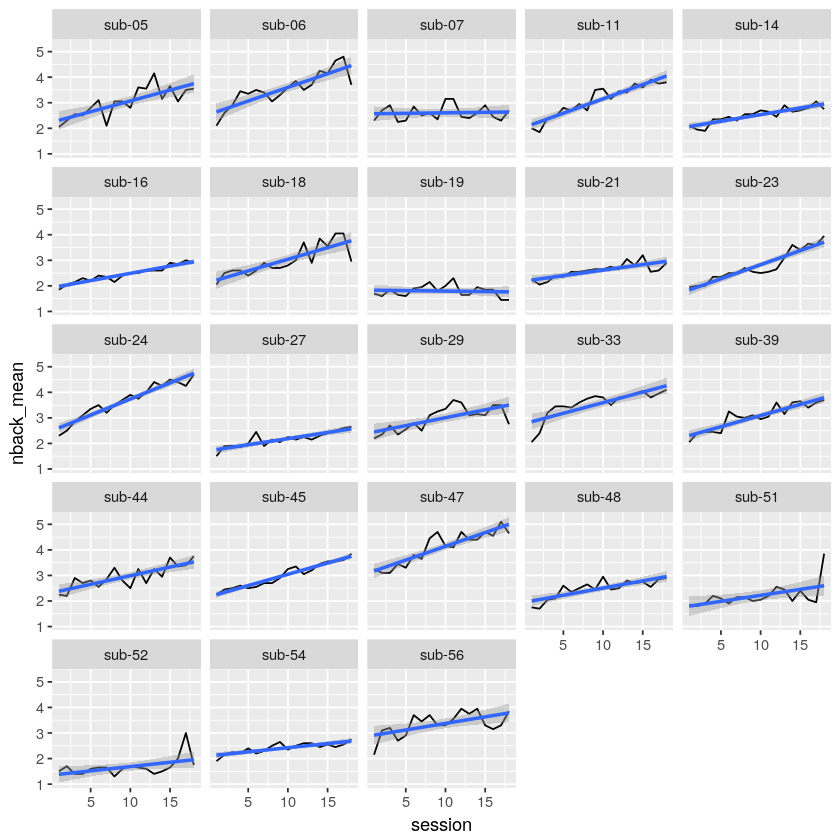

In [216]:
# Plotting data for individual subject

ggplot(training_tidy, aes(x = session, y = nback_mean)) + 
    geom_line() + 
    geom_smooth(method = "lm") + 
    facet_wrap( ~ sub)

session,mean_nback_group
1,2.058696
2,2.232609
3,2.426087
4,2.471739
5,2.541304
6,2.723913


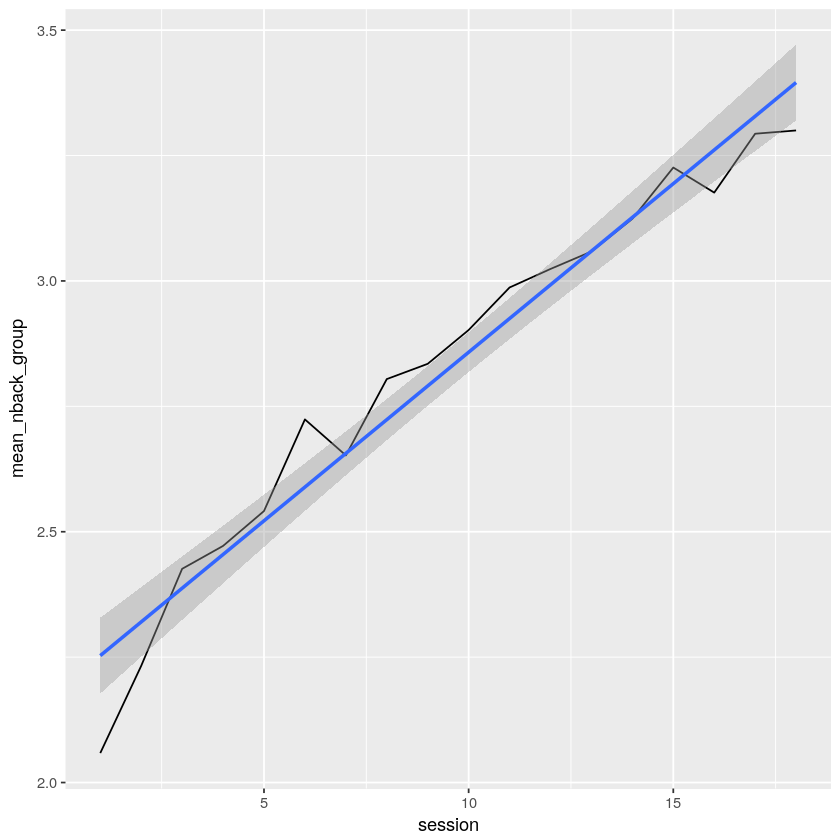

In [217]:
# Plotting data for all subjects

# Summarizing data by session
training_group <- training_tidy %>% 
    group_by(session) %>% 
    summarize(mean_nback_group = mean(nback_mean))

head(training_group)

# Plotting mean of all subjects performance
ggplot(training_group, aes(x = session, y = mean_nback_group)) + 
    geom_line() + 
    geom_smooth(method = "lm")

Observations: 46
Variables: 6
$ sub       <chr> "sub-05", "sub-05", "sub-06", "sub-06", "sub-11", "sub-11...
$ term      <chr> "(Intercept)", "session", "(Intercept)", "session", "(Int...
$ estimate  <dbl> 2.225816993, 0.084416925, 2.533986928, 0.106656347, 2.029...
$ std.error <dbl> 0.185165730, 0.017106398, 0.176705153, 0.016324774, 0.112...
$ statistic <dbl> 12.0206746, 4.9348159, 14.3401983, 6.5334042, 18.0805425,...
$ p.value   <dbl> 2.006777e-09, 1.492907e-04, 1.497144e-10, 6.891041e-06, 4...
Observations: 23
Variables: 2
$ sub                 <chr> "sub-05", "sub-06", "sub-11", "sub-14", "sub-16...
$ nback_mean_estimate <dbl> 0.084416925, 0.106656347, 0.112074303, 0.051754...


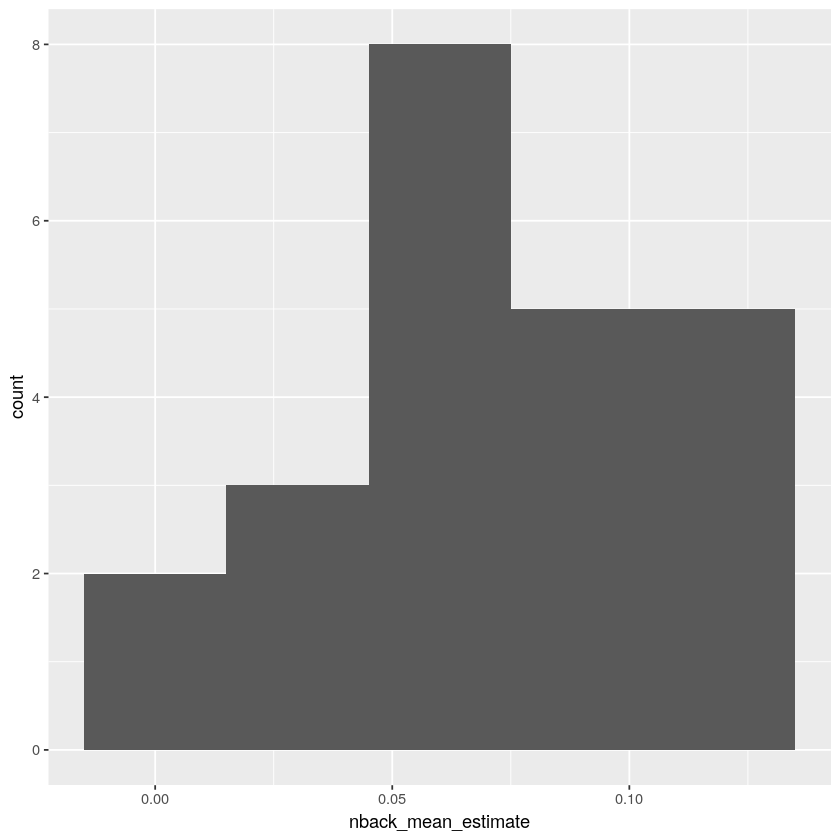

In [222]:
# Nesting to obtain dataframe with linear regression results for each subject
training_lm_mean_full <- training_tidy %>% 
    nest(-sub) %>%
    mutate(model = map(data, ~ lm(nback_mean ~ session, data = .))) %>% 
    mutate(tidied = map(model, tidy)) %>% 
    unnest(tidied)

# Selecting rows with linear regression estimates
training_lm_mean_slope <- training_lm_mean_full %>% 
    filter(term == "session") %>% 
    rename(nback_mean_estimate = estimate) %>%
    select(sub, nback_mean_estimate)

# Checking
glimpse(training_lm_mean_full)

# Plotting histagram of estimates
ggplot(training_lm_mean_slope, aes(nback_mean_estimate)) + geom_histogram(binwidth = 0.03)



Maximum n-back level
--------------------------------------

Observations: 23
Variables: 2
$ sub                <chr> "sub-05", "sub-06", "sub-11", "sub-14", "sub-16"...
$ nback_max_estimate <dbl> 0.118679051, 0.169246646, 0.137254902, 0.0567595...


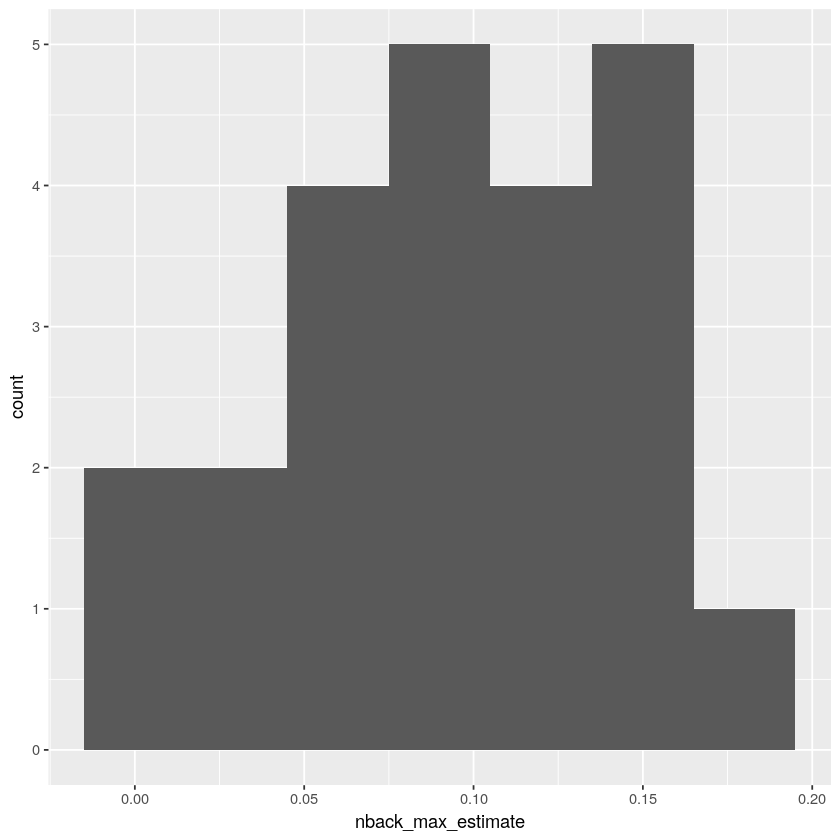

In [247]:
## MAXIMUM N-BACK LEVEL

# Nesting to obtain dataframe with linear regression results for each subject
training_lm_max_full <- training_tidy %>% 
    nest(-sub) %>%
    mutate(model = map(data, ~ lm(nback_max ~ session, data = .))) %>% 
    mutate(tidied = map(model, tidy)) %>% 
    unnest(tidied)

# Selecting rows with linear regression estimates
training_lm_max_slope <- training_lm_max_full %>% 
    filter(term == "session") %>% 
    rename(nback_max_estimate = estimate) %>%
    select(sub, nback_max_estimate)

# Checking
glimpse(training_lm_max_slope)


# Plotting histagram of estimates
ggplot(training_lm_max_slope, aes(nback_max_estimate)) + geom_histogram(binwidth = 0.03)



Additional performance summaries
--------------------------------------

In [248]:
# Filtering dataset to obtain baseline n-level (mean n-back level at first training session)
training_baseline <- training_tidy %>% filter(session == 1) %>% rename(nback_baseline = nback_mean) %>% 
    select(sub, nback_baseline) 

# Filtering dataset to obtain maximum n-level at the whole training period
training_max <- training_tidy %>% group_by(sub) %>% summarize(nback_max_level = max(nback_max))


Joining and saving data
--------------------------------------

In [250]:
# Joining all together
training_summary <- left_join(training_lm_mean_slope, training_lm_max_slope) %>% 
    left_join(training_baseline) %>% 
    left_join(training_max)

head(training_summary)

# Writing training summary to a table
write.csv(training_summary,  file = "data/LB_training_summary.csv", row.names = FALSE)



Joining, by = "sub"
Joining, by = "sub"
Joining, by = "sub"


sub,nback_mean_estimate,nback_max_estimate,nback_baseline,nback_max_level
sub-05,0.08441692,0.11867905,2.05,6
sub-06,0.10665635,0.16924665,2.10,7
sub-11,0.11207430,0.13725490,2.00,5
sub-14,0.05175439,0.05675955,2.10,4
sub-16,0.05696594,0.07946336,1.85,4
sub-18,0.09081527,0.14035088,2.05,7
